<a href="https://colab.research.google.com/github/suhrobm/Continuous-Mathematical-Modeling/blob/commonbranch/CMM_Munavarov_Suhrob_J4234c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Course Project: Win-Lose Scenario Assessment**

---

In this project, we are going to;
  
* formulate a scientific problem associated with the predation type of interaction of populations,
* compile a mathematical model and
* examine it.

---




### **Content** 🎯


Actually, a win-lose scenario is a predator-prey interactions, that is, predation. We can define predation as the ecological process in which an animal hunts, kills and feeds on another animal.

The animal that kills another animal to feed on is called a predator. And, the animal that is consumed by the predator is known as the prey. That is, predation involves one species (the predator) eating the other (the prey), which obviously dies in the exchange.


We will try to provide an introduction to nonlinear dynamics using a well-known model for the predator-prey interaction of **Snowshoe Hare (rabbit)** and **Canadian Lynx**.


**Remarques:**

* **Snowshoe Hare (rabbit)** are the primary food for the **Canadian Lynx** in the Northern boreal forests of North America.

* When **Snowshoe Hare (rabbit)** are available in large quantities, **Canadian Lynx** will eat them about two every three days almost to the complete exclusion of other foods. As a consequence, the population dynamics of the two species are closely linked.

* It has been known for over a century that the populations of the two species vary dramatically in cycles of 8 to 11 year duration.







# **1. Getting Historical Data**

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact
import warnings

from google.colab import drive
drive.mount('/content/drive')

# prevents numpy scientific/exponential notation on print, default is False
# force-suppressing the scientific notation, it is rounded and justified
np.set_printoptions(suppress=False, formatter={'float_kind':'{:0.2f}'.format})
# ignoring warnings
warnings.filterwarnings(action='ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
''' reading whole dataset from the file and loading the data and save it in a working_df DataFrame
'''
path = '/content/drive/MyDrive/ITMO/CMM/LynxHare.txt'
working_df = pd.read_csv(path, delim_whitespace=True, header=None)
working_df.head(10)

,0,1,2
0,1845,19.58,30.09
1,1846,19.60,45.15
2,1847,19.61,49.15
3,1848,11.99,39.52
4,1849,28.04,21.23
5,1850,58.00,8.42
6,1851,74.60,5.56
7,1852,75.09,5.08
8,1853,88.48,10.17
9,1854,61.28,19.60


In [146]:
''' here above, we can see that the columns in the working_df DataFrame are unnamed. So, we can add/name columns
    to an existing working_df DataFrame using its columns attribute.

'''
working_df.columns = ['Year', 'Hare', 'Lynx']  # naming columns respectively
working_df.head(10)


,Year,Hare,Lynx
0,1845,19.58,30.09
1,1846,19.60,45.15
2,1847,19.61,49.15
3,1848,11.99,39.52
4,1849,28.04,21.23
5,1850,58.00,8.42
6,1851,74.60,5.56
7,1852,75.09,5.08
8,1853,88.48,10.17
9,1854,61.28,19.60


In [147]:
''' describe() is used to view some basic statistical details like percentile, mean, std, etc. of a DataFrame, i.e.
    getting some statictical inferences.
'''
working_df.describe()

,Year,Hare,Lynx
count,91.00000,91.000000,91.000000
mean,1890.00000,45.406484,28.336593
std,26.41338,36.375402,18.864463
min,1845.00000,1.800000,3.190000
25%,1867.50000,12.730000,11.840000
50%,1890.00000,40.970000,29.590000
75%,1912.50000,71.405000,42.520000
max,1935.00000,152.650000,79.350000


In [148]:
''' info() helps us to see how many values are existing in each column and their data type. Here, we can
    see many columns have missing values which we need to fill with some sensible values. Handling missing
    data is important as many machine learning algorithms do not support data with missing values.
'''
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    91 non-null     int64  
 1   Hare    91 non-null     float64
 2   Lynx    91 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.3 KB


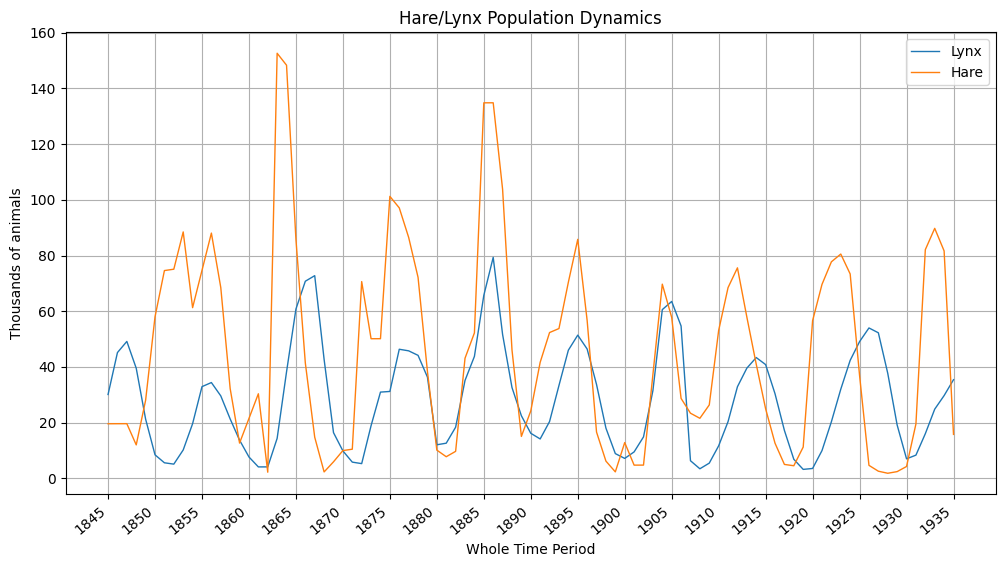

In [149]:
''' plotting the graph
    by default, matplotlib will auto-scale, which is why it hides some year labels, to unhide it you can try to set the MaxNLocator
'''

figure, axe = plt.subplots(figsize=(12,6))
sns.lineplot(data=working_df, y=working_df['Lynx'], x=working_df['Year'], palette="nipy_spectral", linewidth=1, ax=axe, label='Lynx')
sns.lineplot(data=working_df, y=working_df['Hare'], x=working_df['Year'], palette="nipy_spectral", linewidth=1, ax=axe, label='Hare')
plt.ticklabel_format(style='plain', axis='y')
axe.grid(True)
axe.xaxis.set_major_locator(plt.MaxNLocator(20))
axe.set_xticklabels(axe.get_xticklabels(), rotation=40, horizontalalignment='right')
axe.set_title('Hare/Lynx Population Dynamics', fontsize=12)
axe.set_xlabel('Whole Time Period', fontsize=10)
axe.set_ylabel('Thousands of animals', fontsize=10)
plt.show()



# **2. Mathematical Modeling**

### **Modeling**

---

The below equation is Hare ($H$) model equation which describes the time rate of variation of its population density:

$$\begin{align*}\frac{dH}{dt} & = {rH\left(1-\frac{H}{k}\right)}-{\frac{aHL}{c+H}}\\\end{align*}$$


*   the difference between the birth and death rate
*   the death rate of hare is coupled/combined/integrated to the population density of lynx


Parameters:

  the **r** parameter stands for reproduction rate

  the **k** parameter stands for carring capacity *(is the maximum number of individuals of a species that an environment can support)*

  the **a** parameter stands for predation rate

  the **c** parameter stands for Michaelis Constant *(Km ~ the lower the Km, the higher is the affinity/similarity/nearness/closeness)*


---

The below equation is Lynx ($L$) model equation which describes the time rate of variation of its population density:

$$\begin{align*}\frac{dL}{dt} & = {a\frac{bHL}{c+H}}-{dL}\\\end{align*}$$


*   the difference between the birth and death rate
*   The birth rate of lynx is a simple multiple of the death rate of hare


Parameters:

  the **a** parameter stands for predation rate
  
  the **b** parameter stands for conversion
  
  the **c** parameter stands for Michaelis Constant (Km ~ the lower the Km, the higher is the affinity/similarity/nearness/closeness)

  the **d** parameter stands for death rate


# **3. Implementation of the Mathematical Modeling**

In [150]:
'''
    setting parameters' values, we can arbitrarily vary the values based on our needs
'''
a = 3.2
b = 0.6
c = 50
d = 0.56
hare_k = 153
r = 1.6



In [151]:
'''
   writing differential equations for both models, here below derivative function returns a list of two elements' values:
     ▪ first for the derivative of Hare
     ▪ second for the derivative of Lynx

   X: as an argument accepts a list of two elements' values of Hare and Lynx
   t: as an argument accepts the current time
'''

def derivative(X, t):
    Hare, Lynx = X
    dHare = r * Hare * (1 - Hare/hare_k) - a * Hare * Lynx/(c + Hare)  # model for Hare
    dLynx = b * a *Hare * Lynx/(c + Hare) - d * Lynx                   # model for Lynx
    return [dHare, dLynx]



In [152]:
''' simulation
    selecting the time grid and initial states and integrating
'''

t = np.linspace(0,100,500)                  # time grid
init_cond = [20,20]                         # initial conditions for Hare and Lynx
solution = odeint(derivative, init_cond, t) # execute solution, ordinary differential equation, solution[:,0] is equal to Hare
Hare, Lynx = solution.transpose()           # unpack solution



# **4. Visualization and Assessment**

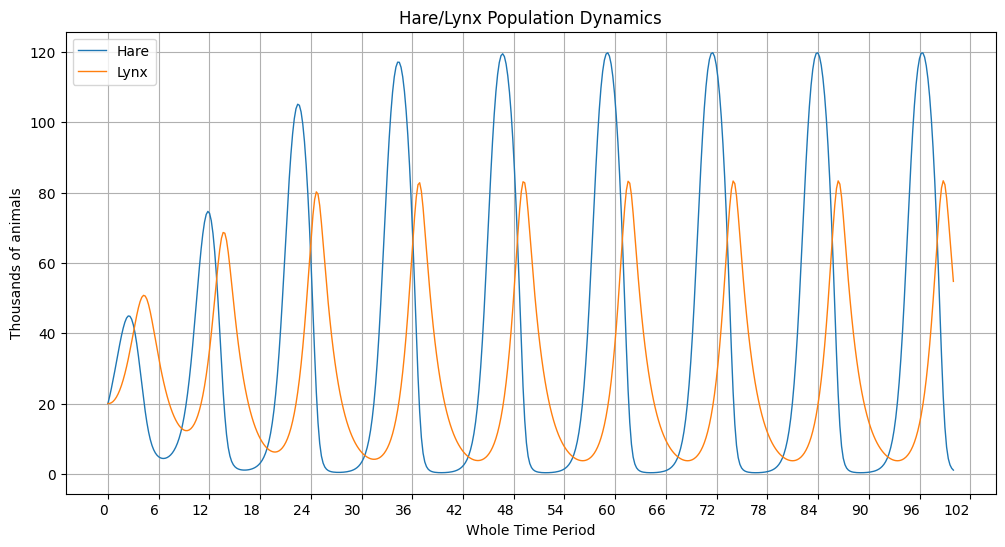

In [153]:
''' plotting the graph
    by default, matplotlib will auto-scale, which is why it hides some year labels, to unhide it you can try to set the MaxNLocator
    plotting Hare and Lynx Population Dynamics based on selected parameters' values and initial states

    for those chosen parameters and initial conditions of the Hare and Lynx, we can find out that their population
    displays stable fluctuations

    ▪ stable, unbroken, uninterrupted, continued, sustained, durable, steady
    ▪ fluctuation, wave, swing, rise and fall, instability, unreliability

'''

figure, axe = plt.subplots(figsize=(12,6))
sns.lineplot(y = Hare, x = t, palette="nipy_spectral", linewidth=1, ax=axe, label='Hare')
sns.lineplot(y = Lynx, x = t, palette="nipy_spectral", linewidth=1, ax=axe, label='Lynx')
plt.ticklabel_format(style='plain', axis='y')
axe.grid(True)
axe.xaxis.set_major_locator(plt.MaxNLocator(20))
axe.set_xticklabels(axe.get_xticklabels(), rotation=0, horizontalalignment='right')
axe.set_title('Hare/Lynx Population Dynamics', fontsize=12)
axe.set_xlabel('Whole Time Period', fontsize=10)
axe.set_ylabel('Thousands of animals', fontsize=10)
plt.show()


# **5. Analyzing of Phase Plane**  

In [ ]:
solution.transpose()

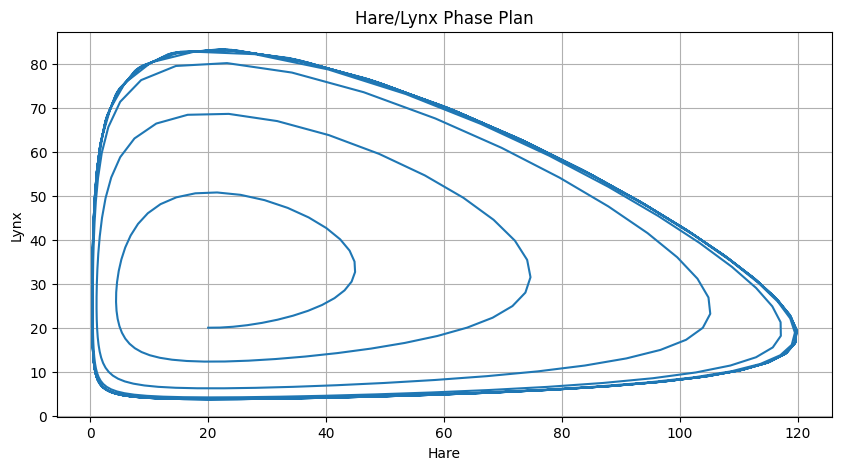

In [214]:
''' plotting the graph
    by default, matplotlib will auto-scale, which is why it hides some year labels, to unhide it you can try to set the MaxNLocator
    plotting Hare and Lynx Phase Plot based on selected parameters' values and initial states

    Phase Plane Analysis

    ▪ provides motion trajectories corresponding to various initial conditions
    ▪ examines the qualitative features of the trajectories
    ▪ obtains information regarding the stability of the equilibrium


    phase planes are useful in visualizing the behaviour of oscillatory/waving systems such as predator-prey models

    phase plan plots the stable/constant steady/fixed state

'''

figure, axe = plt.subplots(figsize=(10,5))
plt.plot(Hare, Lynx)
axe.grid(True)
axe.set_title('Hare/Lynx Phase Plan', fontsize=12)
axe.set_xlabel('Hare', fontsize=10)
axe.set_ylabel('Lynx', fontsize=10)
plt.show()



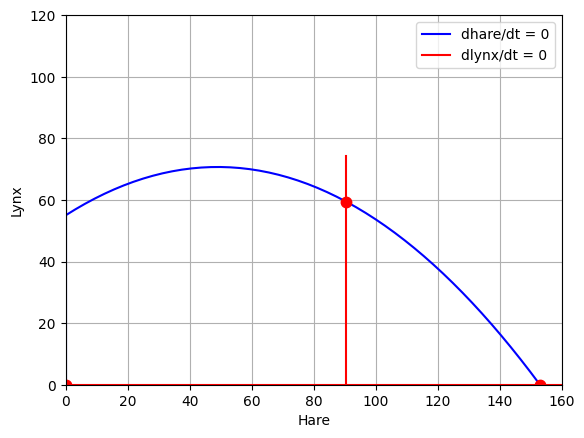

In [232]:
'''
    finding nullclines (zero-slopes):
    zero-slopes are the points in the phase plane where the derivatives are equal to zero
      ▪ for hare, dhare/dt = 0
      ▪ for lynx, dlynx/dt = 0

    plotting the zero-slopes and steady/stationary/fixed/immovable/anchored states that occur where the zero-slopes intersect
    steady states correspond to one of below cases:
      ▪ no hare, and no lynx or
      ▪ hare population at the carry capacity of the environment, and no lynx or
      ▪ constant coexistence of hare and lynx

    intersection points of zero-slopes shows us the steady/fixed state for the given parameter values

'''

def intersection_points():

  ''' for hare, dhare/dt = 0 '''
  hare_point = np.linspace(0, hare_k)
  lynx_deri = (r / a) * (c + hare_point) * (1-hare_point / hare_k)
  plt.plot(hare_point, lynx_deri, 'b')

  ''' for lynx, dlynx/dt = 0 '''
  hare_deri = c * d / (a * b - d)
  plt.plot([hare_deri, hare_deri], plt.ylim(), 'r')

  ''' additional zero-slopes '''
  plt.plot([0,0], plt.ylim(), 'b')
  plt.plot(plt.xlim(), [0,0], 'r')

  ''' steady states '''
  hare_state = c * d / (a * b - d)
  lynx_state = (r / a) * (c + hare_state) * (1-hare_state / hare_k)
  plt.plot([0, hare_k, hare_state], [0, 0, lynx_state], 'r.', ms=15)


  plt.ticklabel_format(style='plain', axis='y')
  plt.ylim(0,120)
  plt.xlim(0,160)
  plt.grid(True)
  plt.legend(['dhare/dt = 0','dlynx/dt = 0'])
  plt.xlabel('Hare', fontsize=10)
  plt.ylabel('Lynx', fontsize=10)


intersection_points()


interactive(children=(FloatSlider(value=3.2, description='aslider', max=4.0, min=1.25, step=0.01), Output()), …

<function __main__.simulation(aslider=3.2)>

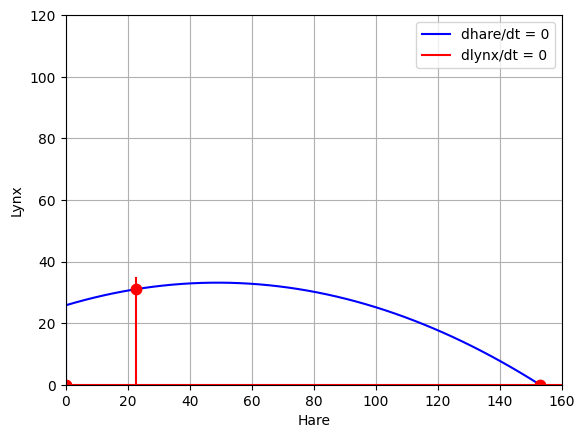

In [233]:
'''
    firstly, below visualization of the zero-slopes give us some insight into how the Hare and Lynx populations depend on the model parameters
    secondly, we look at how the zero-slopes depend on the Hare and Lynx predation rate a
    a is proporational to the success of the Lynx hunting the Hare

'''

def simulation(aslider = 3.2):
    global a
    a = aslider
    intersection_points()

interact(simulation, aslider=(1.25, 4,.01))


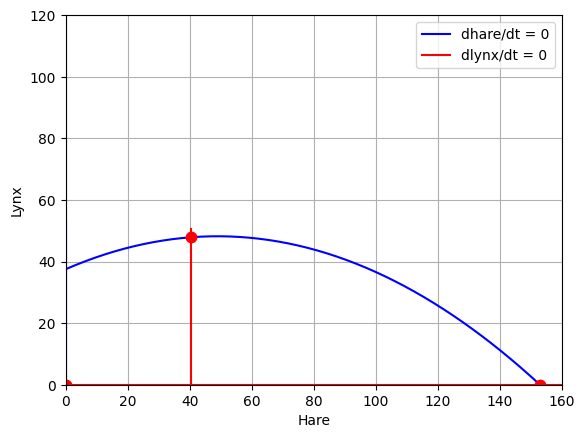

In [234]:
simulation(aslider = 2.2)

# **6. Simulating Interactively**  

In [235]:
'''
    the visualization function for this example accepts a list of time values, values of Hare and Lynx, and model parameters
    the model parameters are needed to plot zero-slopes and steady/fixed states on the phase plane

    LynxHare_Interaction is an additional function which is created to encapsulate the entire process of solving the model
    and displaying the solution. The function takes arguments specifing the initial values of Hare and Lynx, and a value of the parameter a

'''
# specifying the parameters' values one more, we can vary them of course
a = 3.2
b = 0.6
c = 55
d = 0.56
hare_k = 153
r = 1.5
t = np.linspace(0,100,500)


def LynxHare_Interaction(Hare = 20, Lynx = 20, aslider=3.2):

    global a
    a = aslider
    init_cond = [Hare, Lynx]
    solution = odeint(derivative, init_cond, t)
    Hare, Lynx = solution.transpose()

    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.lineplot(y = Hare, x = t, palette="nipy_spectral", linewidth=1, label='Hare')
    sns.lineplot(y = Lynx, x = t, palette="nipy_spectral", linewidth=1, label='Lynx')
    plt.grid(True)
    plt.title('Hare/Lynx Population Dynamics')
    plt.xlabel('Whole Time Period')
    plt.ylabel('Thousands of animals')

    # phase plane
    plt.subplot(1,2,2)
    plt.plot(Hare, Lynx)
    plt.xlim(0,150)
    plt.ylim(0,130)
    intersection_points()



interactive(children=(IntSlider(value=20, description='Hare'), IntSlider(value=20, description='Lynx'), FloatS…

<function __main__.LynxHare_Interaction(Hare=20, Lynx=20, aslider=3.2)>

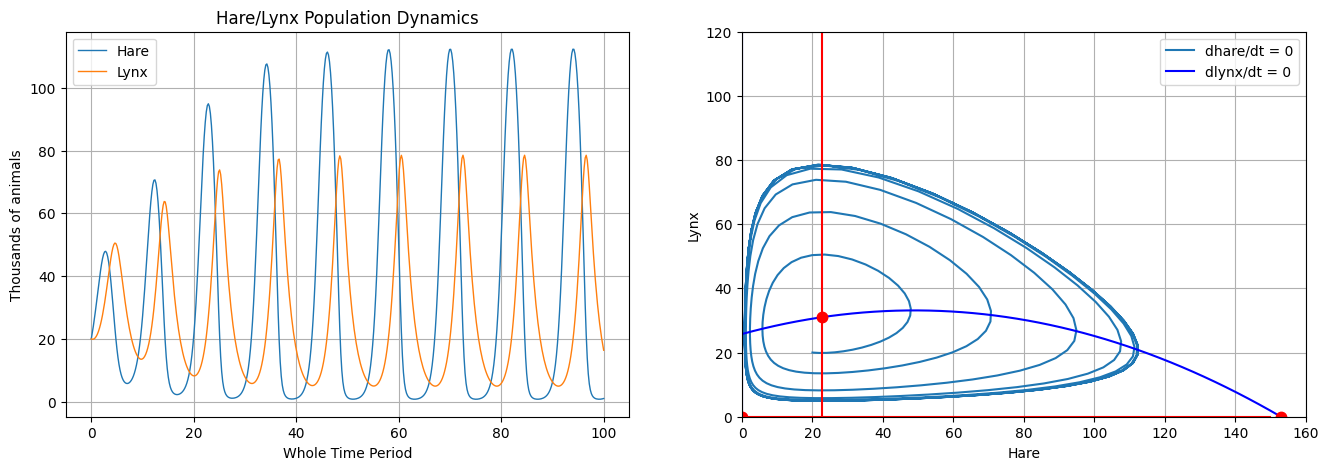

In [236]:
'''
    right below, use the aslider to adjust values of the Hare and Lynx interaction


'''

interact(LynxHare_Interaction, Hare = (0,100,1), Lynx =(0,100,1), aslider=(1.25, 4.0, 0.01))

# **7. Stability of a Fixed State**   

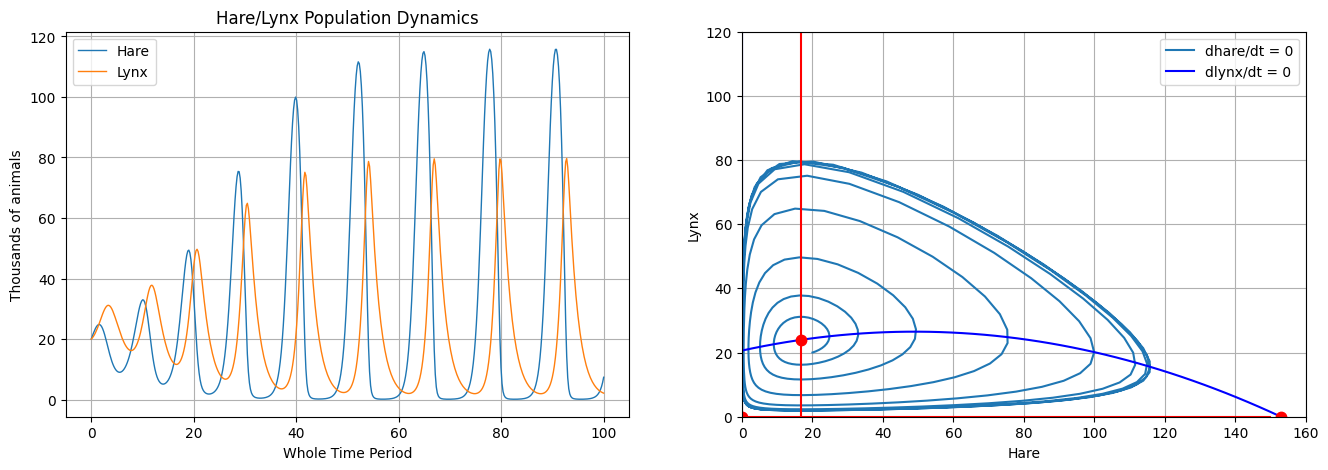

In [237]:
'''
    here, any displacement from an unstable focus leads to a trajectory that spirals away from the steady state,
    as below in phase plane plot
'''

LynxHare_Interaction(Hare = 20, Lynx = 20, aslider = 4)

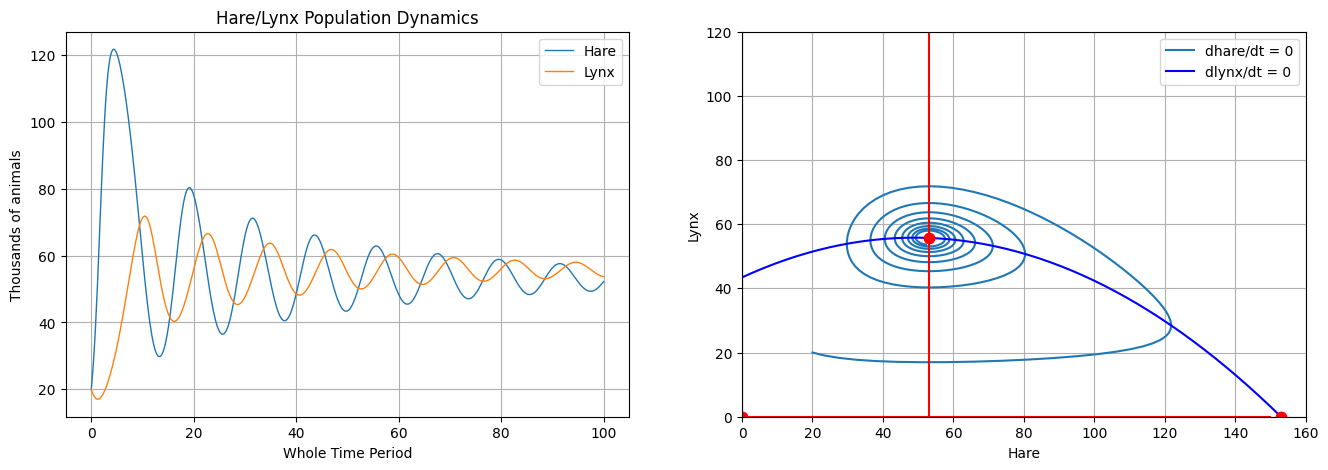

In [238]:
'''
    small displacements from a stable focus results in trajectories that spiral back towards the steady state

'''
LynxHare_Interaction(Hare = 20, Lynx = 20, aslider = 1.9)

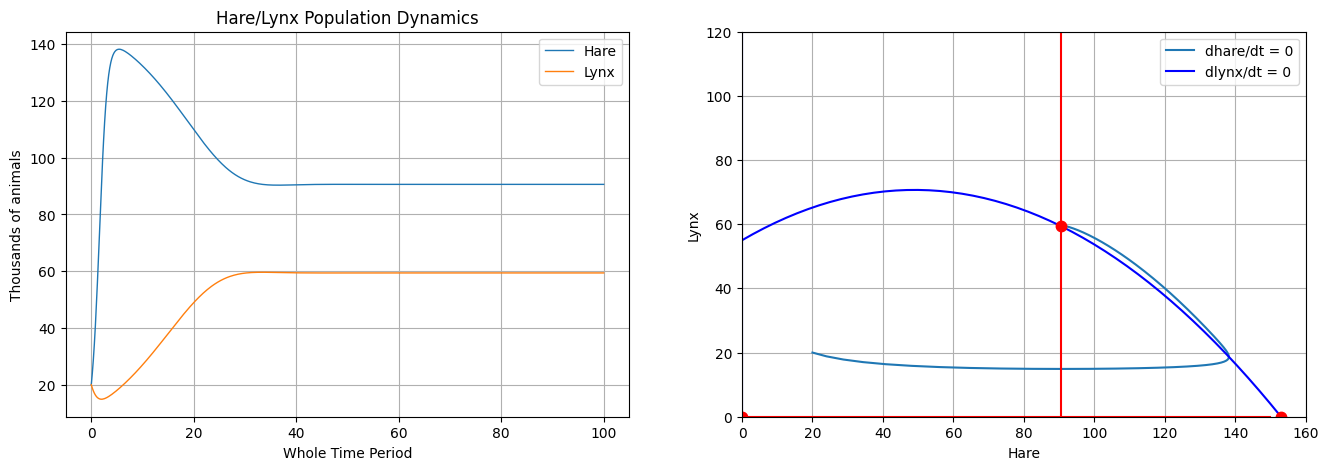

In [239]:
'''
     displacements from a steady state either move towards (stable) or away from (unstable) nodes without the spiral structure of a focus
'''

LynxHare_Interaction(Hare = 20, Lynx = 20, aslider = 1.5)

In [175]:
'''
# creating lists
l1 =[23, 25, 22, 27, 29]
l2 =[69, 54, 73, 70, 74]

# creating the DataFrame from lists => gives two unnamed columns DataFrame
team = pd.DataFrame(list(zip(l1, l2)))

'''
'''



'''
'''



'''
'''



'''
'''



'''



'''
'''



'''
'''



'''
'''



'''
'''



'''
'''



'''
'''



'''
'''



'''
'''



'''
'''



'''
'''







'\n'

In [176]:
''' by default an index is created for DataFrame. But, you can set a specific column of DataFrame as index, if required. To set a column
    as index for a DataFrame, use DataFrame.set_index() function, with the column name passed as argument.

'''
# working_df = working_df.set_index('Year')
# working_df.head(10)

' by default an index is created for DataFrame. But, you can set a specific column of DataFrame as index, if required. To set a column\n    as index for a DataFrame, use DataFrame.set_index() function, with the column name passed as argument.\n\n'